## **Multi Label Classification with SVM**

**Untuk Beberapa Model Seperti Logistic Regression, SVM dan Naive Bayes Wajib untuk dibungkus dengan OneVsRestClassifier atau MultiOutputClassifier**


**Sedangkan untuk Model Seperti Nueral Network dan Random Forest secara bawaan sudah mampu untuk melakukan Multi Label Classification**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# dataset
from sklearn.datasets import make_multilabel_classification

# preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelBinarizer

# model
from sklearn.svm import SVC

# Multi Label handling
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multioutput import MultiOutputClassifier

# metrics for multi class classifications
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    multilabel_confusion_matrix,
    roc_auc_score,
    roc_curve,
    auc,
)

#
import warnings

warnings.filterwarnings("ignore")

In [3]:
# generate dataset untuk multi label classification dengan make_multilabel_classification
X, y = make_multilabel_classification(n_samples=500, n_features=8, n_classes=3, n_labels=3,  random_state=42, )

print("Multi Label adalah kondisi dimana pada target (y) terdapat lebin dari 1 column, dengan value pada setiap label/column antara True (1) atau False (0) \n")
print(y[:10])

X.shape, y.shape

Multi Label adalah kondisi dimana pada target (y) terdapat lebin dari 1 column, dengan value pada setiap label/column antara True (1) atau False (0) 

[[1 1 0]
 [1 1 1]
 [0 0 1]
 [1 1 1]
 [0 1 0]
 [1 1 0]
 [1 1 1]
 [0 0 1]
 [0 0 0]
 [1 1 1]]


((500, 8), (500, 3))

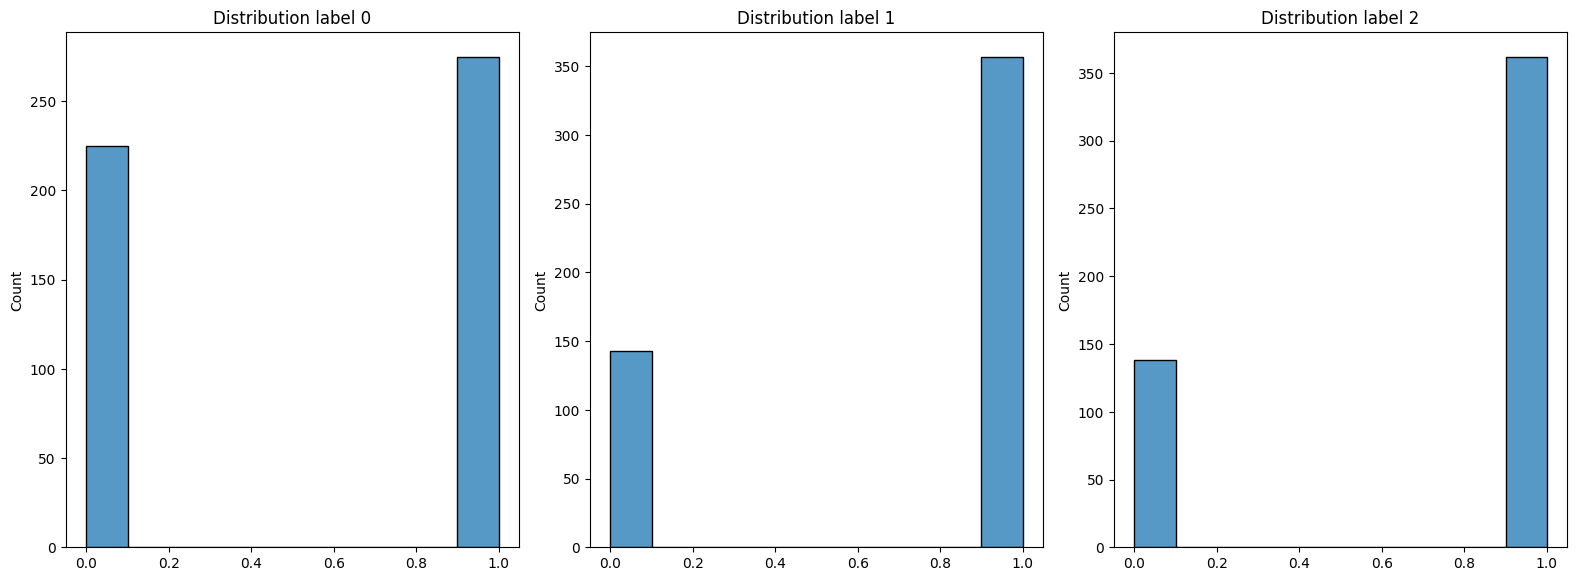

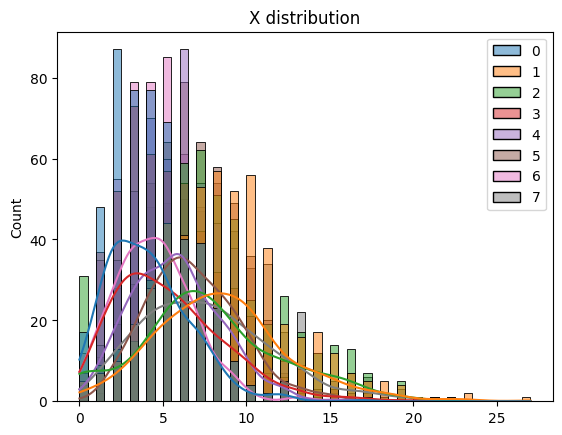

In [4]:
# plot data
fig, ax = plt.subplots(ncols=3, nrows=1,  figsize=(16,6))
fig.tight_layout(pad=2)
for i in range(y.shape[1]):
    sns.histplot(data=y[:, i], ax=ax[i])
    ax[i].set_title(f"Distribution label {i}")
plt.show()

# plot X
sns.histplot(data=X, kde=1)
plt.title("X distribution")
plt.show()

In [5]:
# split train and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((400, 8), (100, 8), (400, 3), (100, 3))

In [6]:
# Standarize data
SC = StandardScaler()

X_train_scaled = SC.fit_transform(X_train, y_train)
X_test_scaled = SC.transform(X_test)


In [7]:
# train model

clf1 = OneVsRestClassifier(estimator=SVC(probability=True))
clf2 = MultiOutputClassifier(estimator=SVC(probability=True))

clf1.fit(X_train_scaled, y_train)
clf2.fit(X_train_scaled, y_train)


print(f"Parameter clf 1 : \n ", clf1.get_params())
print(f"Parameter clf 2 : \n ", clf2.get_params())

Parameter clf 1 : 
  {'estimator__C': 1.0, 'estimator__break_ties': False, 'estimator__cache_size': 200, 'estimator__class_weight': None, 'estimator__coef0': 0.0, 'estimator__decision_function_shape': 'ovr', 'estimator__degree': 3, 'estimator__gamma': 'scale', 'estimator__kernel': 'rbf', 'estimator__max_iter': -1, 'estimator__probability': True, 'estimator__random_state': None, 'estimator__shrinking': True, 'estimator__tol': 0.001, 'estimator__verbose': False, 'estimator': SVC(probability=True), 'n_jobs': None, 'verbose': 0}
Parameter clf 2 : 
  {'estimator__C': 1.0, 'estimator__break_ties': False, 'estimator__cache_size': 200, 'estimator__class_weight': None, 'estimator__coef0': 0.0, 'estimator__decision_function_shape': 'ovr', 'estimator__degree': 3, 'estimator__gamma': 'scale', 'estimator__kernel': 'rbf', 'estimator__max_iter': -1, 'estimator__probability': True, 'estimator__random_state': None, 'estimator__shrinking': True, 'estimator__tol': 0.001, 'estimator__verbose': False, 'est

In [8]:
# evalution model
y1_pred = clf1.predict(X_test_scaled)
y1_proba = clf1.predict_proba(X_test_scaled)

y2_pred = clf2.predict(X_test_scaled)
y2_proba = clf2.predict_proba(X_test_scaled)


# metrics
acc_1 = accuracy_score(y_test, y1_pred)
f1_1 = f1_score(y_test, y1_pred, average="weighted")
clf_report_1 = classification_report(y_test, y1_pred)

acc_2 = accuracy_score(y_test, y2_pred)
f1_2 = f1_score(y_test, y2_pred, average="weighted")
clf_report_2 = classification_report(y_test, y2_pred)


# print output metrics
print(f"accuracy score OneVsRestClassifier : {acc_1}")
print(f"F1 score Model OneVsRestClassifier : {f1_1}")
print(f"Classification Report OneVsRestClassifier :", clf_report_1)

print(f"accuracy score MultiOutputClassifier : {acc_2}")
print(f"F1 score MultiOutputClassifier : {f1_2}")
print(f"Classification Report MultiOutputClassifier :", clf_report_2)

accuracy score OneVsRestClassifier : 0.67
F1 score Model OneVsRestClassifier : 0.8821143544133148
Classification Report OneVsRestClassifier :               precision    recall  f1-score   support

           0       0.87      0.93      0.90        56
           1       0.84      0.95      0.89        66
           2       0.79      0.94      0.86        68

   micro avg       0.83      0.94      0.88       190
   macro avg       0.83      0.94      0.88       190
weighted avg       0.83      0.94      0.88       190
 samples avg       0.80      0.83      0.81       190

accuracy score MultiOutputClassifier : 0.67
F1 score MultiOutputClassifier : 0.8821143544133148
Classification Report MultiOutputClassifier :               precision    recall  f1-score   support

           0       0.87      0.93      0.90        56
           1       0.84      0.95      0.89        66
           2       0.79      0.94      0.86        68

   micro avg       0.83      0.94      0.88       190
   macro 

Plot Confusion Matrix

Total Data using in predict model: 100 data 

OneVsRestClassifier: 


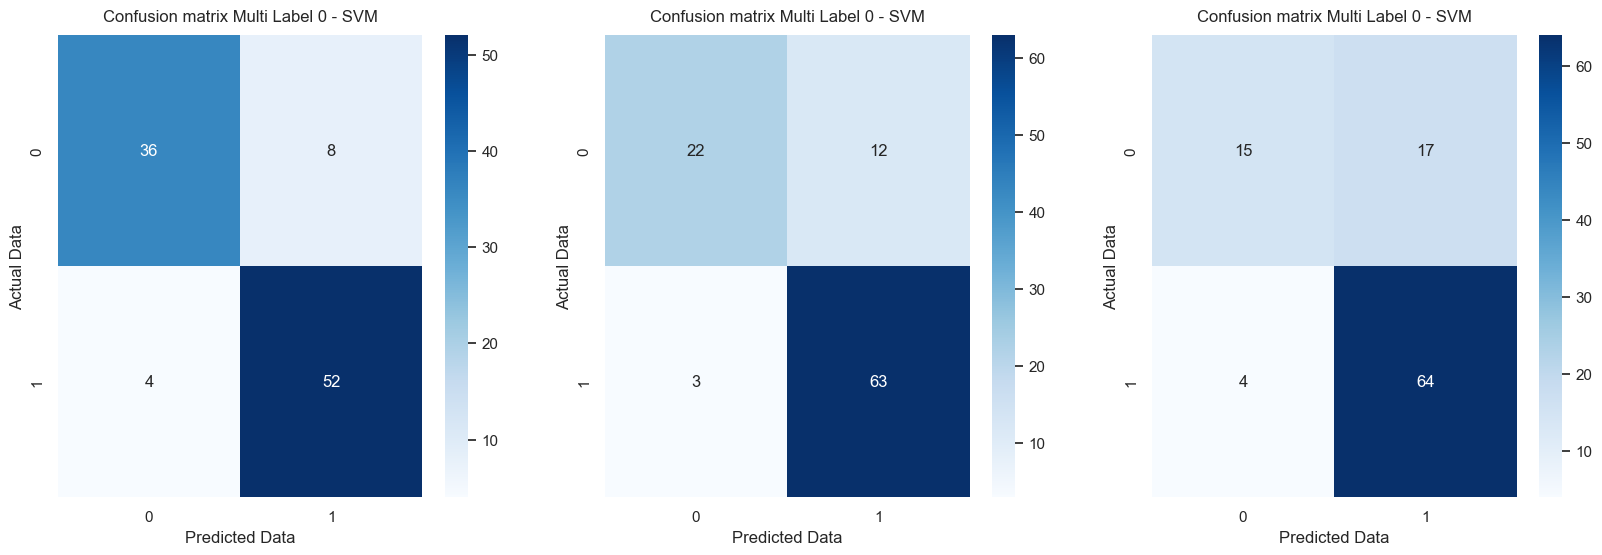

MultiOutputClassifier : 


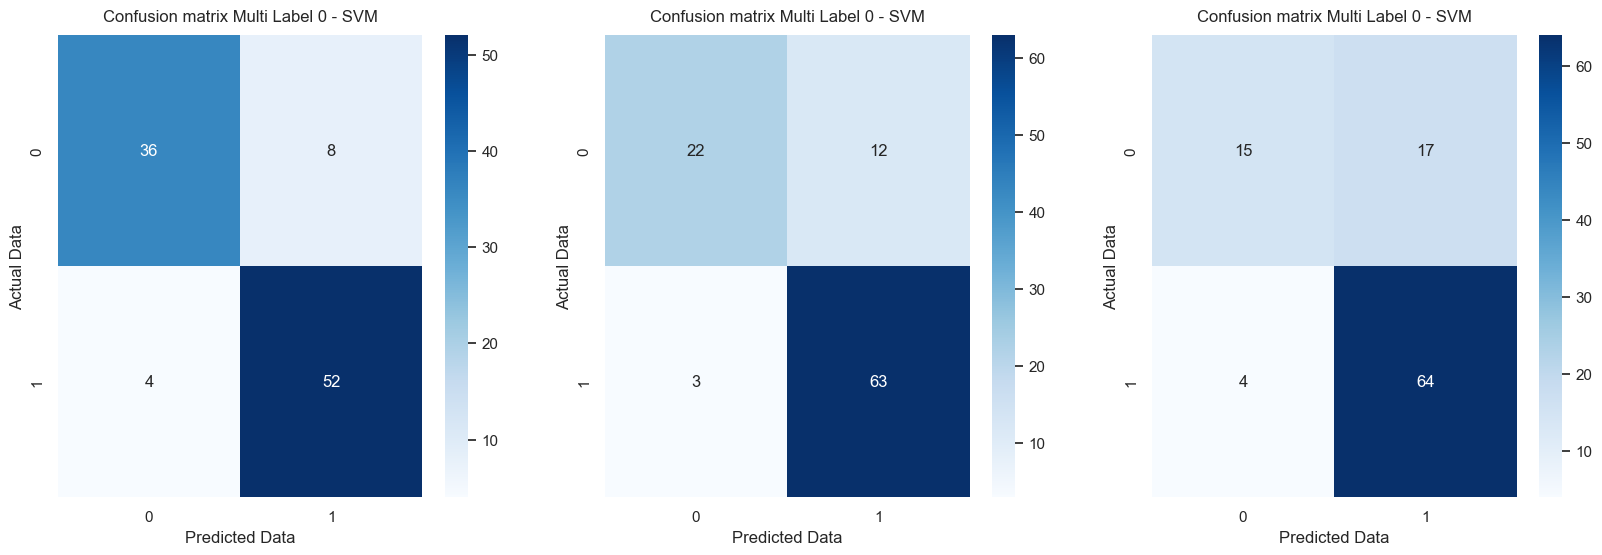

In [9]:
sns.set()
print(f"Total Data using in predict model: {X_test_scaled.shape[0]} data \n")


c1_matrix = multilabel_confusion_matrix(y_test, y1_pred)
c2_matrix = multilabel_confusion_matrix(y_test, y2_pred)


# plot confusion Matrix Model with OneVsRestClassifier
print("OneVsRestClassifier: ")
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(20,6))
for i, matrix in enumerate(c1_matrix):
    sns.heatmap(data=matrix, annot=True, ax=ax[i], cmap="Blues")
    ax[i].set_title(f"Confusion matrix Multi Label {0} - SVM", pad=10, fontsize=12)
    ax[i].set_ylabel("Actual Data")
    ax[i].set_xlabel("Predicted Data")
plt.show()


# plot confusion Matrix Model with MultiOutputClassifier
print("MultiOutputClassifier : ")
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(20, 6))
for i, matrix in enumerate(c2_matrix):
    sns.heatmap(data=matrix, annot=True, ax=ax[i], cmap="Blues")
    ax[i].set_title(
        f"Confusion matrix Multi Label {0} - SVM", pad=10, fontsize=12
    )
    ax[i].set_ylabel("Actual Data")
    ax[i].set_xlabel("Predicted Data")
plt.show()

#### **Plot ROC & AUC** 

##### Plot ROC untuk setiap label dan class

ROC Curve OneVsRestClassifier: 

Overall AUC (OvR): 0.89
Overall AUC (OvO): 0.89


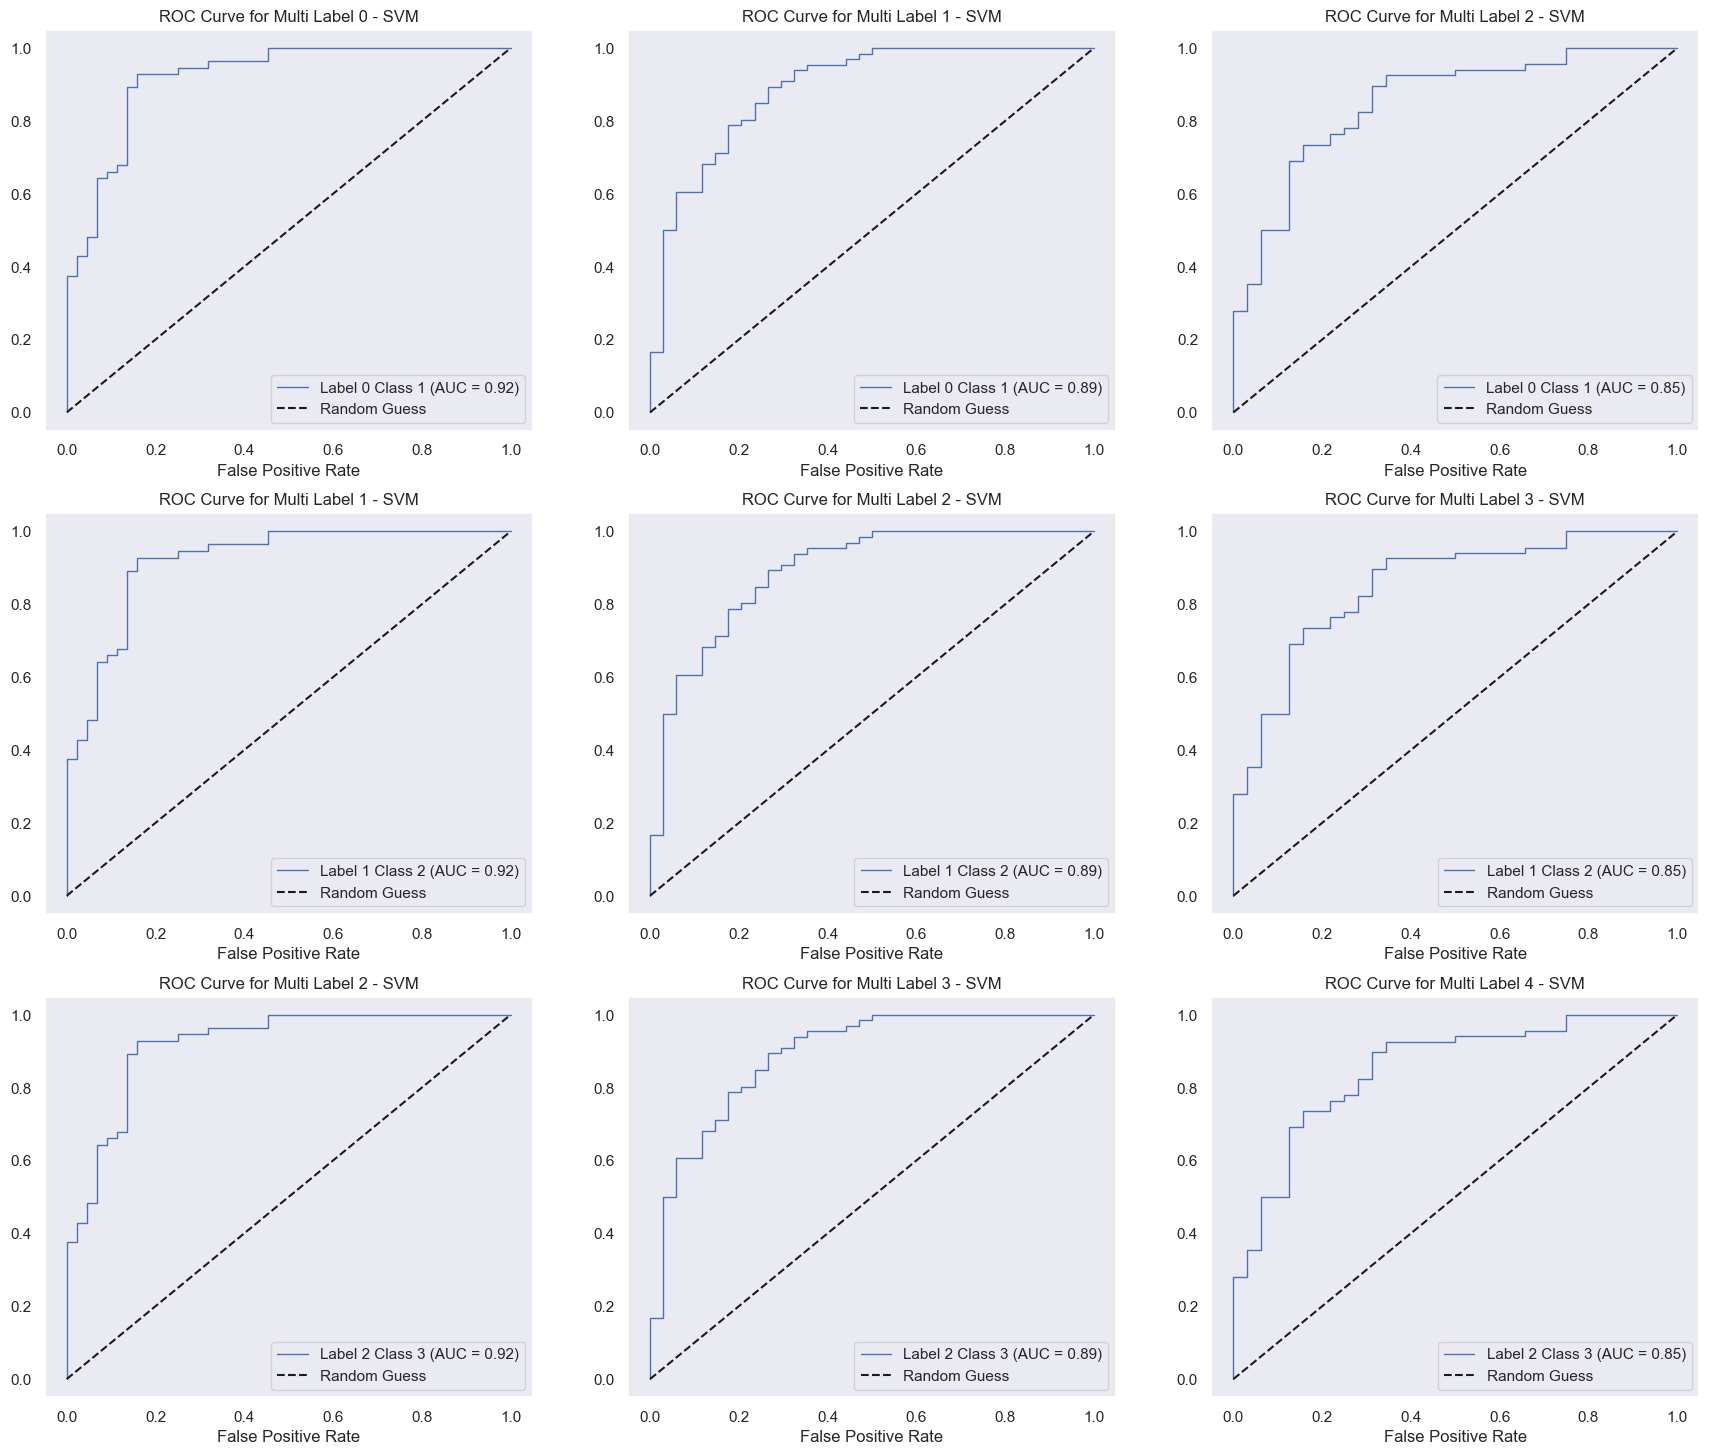

In [10]:
# Binarize labels y_test
lb = LabelBinarizer()
y_test_binarized = lb.fit_transform(y_test)


# Plot ROC OneVsRestClassifier
print("ROC Curve OneVsRestClassifier: \n")
fig, ax = plt.subplots(ncols=3, nrows=3, figsize=(18, 15))
fig.tight_layout(pad=3)
# plot for each classs in each Label
for idx in range(3):
    
    # colums
    for i in range(3):
        fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y1_proba[:, i])
        roc_auc = auc(fpr, tpr)
        ax[idx][i].plot(fpr, tpr, label=f"Label {idx} Class {idx+1} (AUC = {roc_auc:.2f})", linewidth=1)

        ax[idx][i].plot([0, 1], [0, 1], "k--", label="Random Guess")

        ax[idx][i].set_xlabel("False Positive Rate")
        ax[idx][i].set_title(f"ROC Curve for Multi Label {idx+i} - SVM")
        ax[idx][i].legend(loc="lower right")
        ax[idx][i].grid()


roc_auc_ovr = roc_auc_score(y_test_binarized, y1_proba, multi_class="ovr")
roc_auc_ovo = roc_auc_score(y_test_binarized, y1_proba, multi_class="ovo")
print(f"Overall AUC (OvR): {roc_auc_ovr:.2f}")
print(f"Overall AUC (OvO): {roc_auc_ovo:.2f}")

##### Plot ROC untuk semua label dan class sekaligus

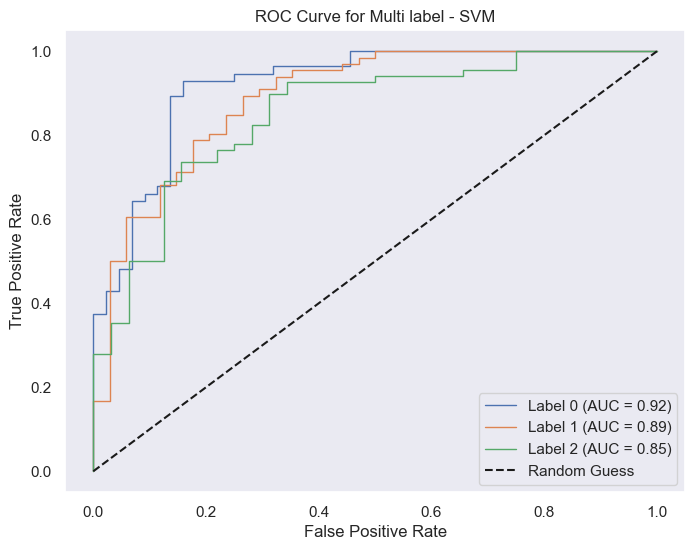

In [11]:
# Binarize labels y_test
lb = LabelBinarizer()
y_test_binarized = lb.fit_transform(y_test)

# Plot ROC Curve for each class

plt.figure(figsize=(8,6))

for i in range(len(lb.classes_)):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y1_proba[:, i])
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f"Label {i} (AUC = {roc_auc:.2f})", linewidth=1)


# Plot random guess line
plt.plot([0, 1], [0, 1], "k--", label="Random Guess")

# 8. Customize plot
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve for Multi label - SVM")
plt.legend(loc="lower right")
plt.grid()
plt.show()

